In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fairlearn.datasets import fetch_boston
from sklearn.model_selection import train_test_split

In [2]:
df=fetch_boston()

c:\Users\Aditya\anaconda3\Lib\site-packages\fairlearn\datasets\_fetch_boston.py:150: DataFairnessWarning: You are about to use a dataset with known fairness issues.
  warnings.warn(DataFairnessWarning(msg))


In [3]:
dataset=pd.DataFrame(df.data)

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [5]:
dataset.shape

(506, 13)

In [6]:
X=dataset
y=df.target

In [7]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [12]:
rg=LinearRegression()
rg.fit(X_train,y_train)

LinearRegression()

In [13]:
mse=cross_val_score(rg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [14]:
np.mean(mse)

-25.550660791660796

In [15]:
y_pred=rg.predict(X_test)

In [16]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

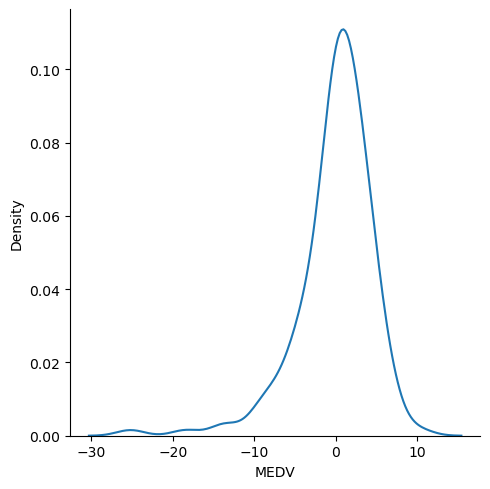

In [17]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [18]:
from sklearn.metrics import r2_score

In [19]:
score=r2_score(y_pred,y_test)
score

0.6693702691495589

Ridge Regression 

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [21]:
ridge_regressor=Ridge()

In [22]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [23]:
print(ridgecv.best_params_)

{'alpha': 10}


In [24]:
print(ridgecv.best_score_)

-25.80722882229147


In [25]:
ridge_pred=ridgecv.predict(X_test)

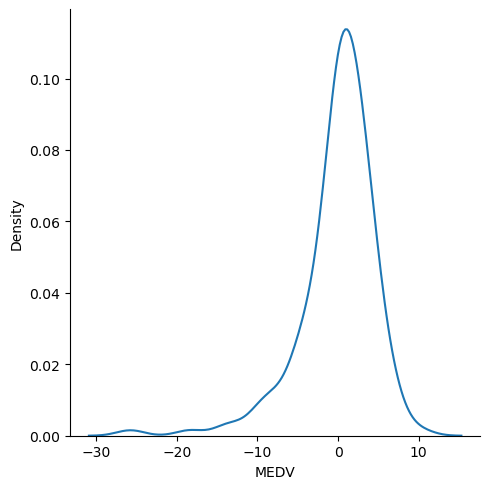

In [26]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [27]:
score=r2_score(ridge_pred,y_test)
score

0.6468557055633651

Lasso Regression

In [28]:
from sklearn.linear_model import Lasso

In [29]:
lasso=Lasso()

In [30]:
parameter={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [31]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-31.153603752119004


In [32]:
lasso_pred=lassocv.predict(X_test)

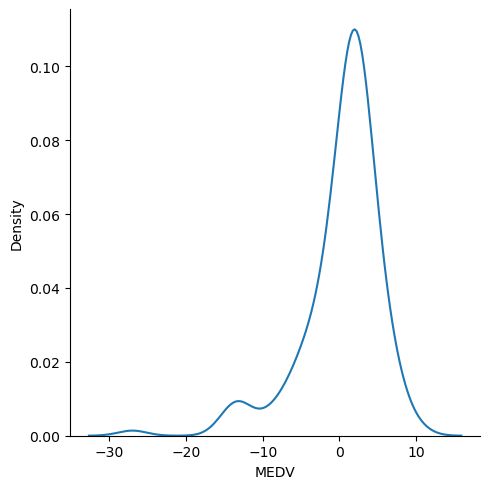

In [33]:
sns.displot(lasso_pred-y_test,kind='kde')

In [34]:
score=r2_score(lasso_pred,y_test)
score

0.32577461229516547